In [1]:
import os
from gradio_client import Client, handle_file
from PIL import Image  # Make sure this is imported
import matplotlib.pyplot as plt
import shutil
import string
import random

In [2]:
HF_TOKEN = os.environ.get("HF_TOKEN")

In [12]:

client = Client("suspicious-cow/FLUX.1-dev", hf_token=HF_TOKEN)
result = client.predict(
		prompt="""
			Post-apocalyptic Cyberpunk Night Market: Picture a bustling, chaotic street market deep within the heart of a crumbling city, set in a dystopian future. The sky above is a thick, polluted haze that glows neon from the endless advertisements projected onto towering, decaying skyscrapers. The buildings surrounding the market are a mix of high-tech and rundown, with exposed wiring, rusting metal, and glowing digital billboards, flashing in a mix of blues, purples, and greens.
			The market is packed with a diverse array of beings—humans, androids, and cybernetic creatures—all interacting under the cold neon lights. Stalls are lit with holographic displays, showcasing everything from glowing mechanical body parts to exotic alien foods and black-market tech. The vendors, some human and others robotic, display their wares behind protective glass, with robotic arms reaching out to customers. In the background, small flying drones buzz around, advertising illicit deals or scanning for troublemakers.
			Above, sleek, dark hovercars zoom by, leaving behind trails of light, while towering billboards reflect off puddles of rain-soaked pavement, giving the scene a glossy, reflective texture. Steam rises from manholes and food stalls, mixing with the rain, creating an eerie, almost dreamlike atmosphere. In the distance, towering skyscrapers disappear into the smog, illuminated by distant lightning flashes from an impending storm.
			At the center of the market, a shady, neon-lit alleyway branches off, leading to secretive underground deals—cyber-hackers, smugglers, and mercenaries exchanging goods. A low hum of electronic music and chatter fills the air, as the people of this dystopia try to survive in a world where technology has overtaken humanity.
			""",
		seed=0,
		randomize_seed=True,
		width=1024,
		height=1024,
		guidance_scale=3.5,
		num_inference_steps=28,
		api_name="/infer"
)
print(result)

Loaded as API: https://suspicious-cow-flux-1-dev.hf.space ✔
('C:\\Users\\Zain_\\AppData\\Local\\Temp\\gradio\\92b7b0b9398c77127b1e0e8bec437bdb081d9ae6d8478aae4e44b526d813f31c\\image.webp', 455492735)


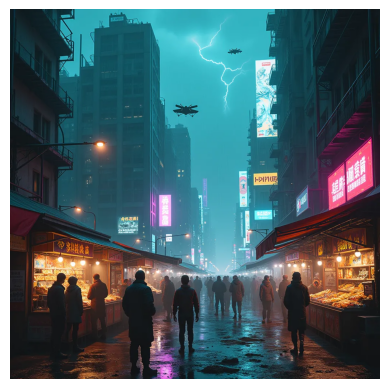

In [13]:
# Extract the image path from the result tuple
image_path = result[0]

# Generate a random string to append to the filename
random_string = ''.join(random.choices(string.ascii_letters + string.digits, k=8))

# Define the new permanent location for the image with the random string
filename = f"generated_image_{random_string}.webp"
permanent_location = os.path.join("./flux1_images", filename)

# Ensure the destination directory exists
os.makedirs("./flux1_images", exist_ok=True)

# Move the image to the new permanent location
shutil.move(image_path, permanent_location)

# Open the image from the new location using PIL
image = Image.open(permanent_location)

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()
